In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [108]:
df = pd.read_csv('./dataset/titanic3.csv')
df1 = df.copy()
df1.head() # 복사본 하나 만듬
# carbin = 객실 넘버
# embarked = 탑승항구 C - Cherbourg Q - Queenstown S - Southampton
# ticket = 티켓 넘버
# parch = 함께 탑승한 부모, 자녀수 총합
# sibsp = 함께 탑승한 형제,자매 , 배우자 수 총합
# pcalss = 티켓 클래스 1 - upper 2 - middle 3 - lower
# fare = 탑승요금
# carbin 객실
# body = Body Identification Number = 신체 식별 번호 , 시체 상태
# boat = 구명정이라고 하는데 탄 구명정 번호를 뜻하는것 같은데
# Master
# 주로 남자 아이에게 사용
# Mr
# 일반 남성에게 사용

# Miss
# 미혼 여성에게 사용
# (Mrs보다 연령이 낮음) 
# Mrs
# 기혼 여성에게 사용
# (Miss보다 연령이 높음)

# 만약에 나이가 많은데 결혼을 안했으면 뭐라고 나옴?

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.00,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.00,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.00,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [109]:
# 일단은 무언가를 구하기 전에 만든 복사본에 필요없다고 생각되는건 지움
# boat는 survived와 관련되서 지움
# body 신체식별번호라고 나오는거 보니까 그냥 없어도 될것같다.
# 일단 name까지 지움
# 생존자들의 생존이유 구하는게 목표니까 home도 지워도 될듯
df1.drop(['body','boat','name','home.dest'],axis=1,inplace=True)
# type(df1) 데이터 프레임 맞는데

In [110]:
# 이름에서 호칭을 잘 보라고 하셨음
name_df = df['name'].str.split('[,.]', 2, expand=True)
name_df.columns = ['family','honor','name']
# 호칭을 3개로 나눴음 
name_df['family'] = name_df['family'].str.strip()
name_df['honor'] = name_df['honor'].str.strip()
name_df['name'] = name_df['name'].str.strip()
name_df.drop(['family','name'],axis=1,inplace=True)
name_df
# 이거 원본이랑 결합하면 됨

,honor
0,Miss
1,Master
2,Miss
3,Mr
4,Mrs
...,...
1304,Miss
1305,Miss
1306,Mr
1307,Mr


In [111]:
# honor에서 호칭 세기
name_df['honor'].value_counts() # 총합은 1309
# Mr =757 Miss = 260 Mrs = 197 Master =61
# Master 밑에 호칭들 총합 34

Mr              757
Miss            260
Mrs             197
Master           61
Rev               8
Dr                8
Col               4
Mlle              2
Ms                2
Major             2
Capt              1
Sir               1
Dona              1
Jonkheer          1
the Countess      1
Don               1
Mme               1
Lady              1
Name: honor, dtype: int64

In [112]:
# 따로 뽑아낸 honor와 원본복사본을 결합
# 나이 결측값을 채우기위해서 시각화 한번해봤는데 안해도될듯
df2 = pd.concat([name_df,df1],axis=1)
# plt.figure(figsize=(18,5))
# sns.boxplot(x=df2['honor'],y=df2['age'],data=df)

In [54]:
df2.head()

,honor,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,Miss,1,1,female,29.00,0,0,24160,211.3375,B5,S
1,Master,1,1,male,0.92,1,2,113781,151.5500,C22 C26,S
2,Miss,1,0,female,2.00,1,2,113781,151.5500,C22 C26,S
3,Mr,1,0,male,30.00,1,2,113781,151.5500,C22 C26,S
4,Mrs,1,0,female,25.00,1,2,113781,151.5500,C22 C26,S


In [113]:
df2[['age','honor']].groupby('honor').mean()

,age
honor,
Capt,70.000000
Col,54.000000
Don,40.000000
Dona,39.000000
Dr,43.571429
Jonkheer,38.000000
Lady,48.000000
Major,48.500000
Master,5.482642


In [114]:
# 결측치 채우기
age_mean = df2[['honor', 'age']].groupby('honor').mean().reset_index() 
age_mean.columns = ['honor', 'honor_age']

df2 = pd.merge(df2, age_mean, on='honor', how='left') 
df2.loc[(df2['age'].isnull()),'age'] = df2['honor_age'] 
df2 = df2.drop('honor_age', axis=1)
df2.head()

,honor,pclass,survived,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,Miss,1,1,female,29.00,0,0,24160,211.3375,B5,S
1,Master,1,1,male,0.92,1,2,113781,151.5500,C22 C26,S
2,Miss,1,0,female,2.00,1,2,113781,151.5500,C22 C26,S
3,Mr,1,0,male,30.00,1,2,113781,151.5500,C22 C26,S
4,Mrs,1,0,female,25.00,1,2,113781,151.5500,C22 C26,S


In [115]:
# parch,sibsp는 자녀수,배우자수니까 같이 탄 사람으로써 합침
df2['family'] = df2['parch'] + df2['sibsp']
df2['family'].value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: family, dtype: int64

In [116]:
# family로 합친 변수랑 티켓은 필요없어보이니 삭제
df2.drop(['sibsp','parch','ticket'],axis=1,inplace=True)
df2.head()

,honor,pclass,survived,sex,age,fare,cabin,embarked,family
0,Miss,1,1,female,29.00,211.3375,B5,S,0
1,Master,1,1,male,0.92,151.5500,C22 C26,S,3
2,Miss,1,0,female,2.00,151.5500,C22 C26,S,3
3,Mr,1,0,male,30.00,151.5500,C22 C26,S,3
4,Mrs,1,0,female,25.00,151.5500,C22 C26,S,3


In [117]:
# 혼자인지 아닌지
df2.loc[df2['family']==0, 'alone'] = 1
df2['alone'].fillna(0, inplace=True)
df2.head()

,honor,pclass,survived,sex,age,fare,cabin,embarked,family,alone
0,Miss,1,1,female,29.00,211.3375,B5,S,0,1.0
1,Master,1,1,male,0.92,151.5500,C22 C26,S,3,0.0
2,Miss,1,0,female,2.00,151.5500,C22 C26,S,3,0.0
3,Mr,1,0,male,30.00,151.5500,C22 C26,S,3,0.0
4,Mrs,1,0,female,25.00,151.5500,C22 C26,S,3,0.0


In [118]:
# 좌석도 필요없어 보이니 삭제
df2.drop(['cabin'],axis=1,inplace=True)
df2.head()

,honor,pclass,survived,sex,age,fare,embarked,family,alone
0,Miss,1,1,female,29.00,211.3375,S,0,1.0
1,Master,1,1,male,0.92,151.5500,S,3,0.0
2,Miss,1,0,female,2.00,151.5500,S,3,0.0
3,Mr,1,0,male,30.00,151.5500,S,3,0.0
4,Mrs,1,0,female,25.00,151.5500,S,3,0.0


In [119]:
# 인코딩 할때 오브젝트는 안된다
cat= df2.columns[df2.dtypes=='object']
print(cat)

Index(['honor', 'sex', 'embarked'], dtype='object')


In [120]:
df2.loc[~((df2['honor']=='Mr') | (df2['honor']=='Miss') | (df2['honor']=='Master') 
         |(df2['honor']=='Mrs')),'honor'] = 'other'
df2.head()

,honor,pclass,survived,sex,age,fare,embarked,family,alone
0,Miss,1,1,female,29.00,211.3375,S,0,1.0
1,Master,1,1,male,0.92,151.5500,S,3,0.0
2,Miss,1,0,female,2.00,151.5500,S,3,0.0
3,Mr,1,0,male,30.00,151.5500,S,3,0.0
4,Mrs,1,0,female,25.00,151.5500,S,3,0.0


In [136]:
df2.isnull().sum()

honor       0
pclass      0
survived    0
sex         0
age         0
embarked    0
family      0
alone       0
dtype: int64

In [138]:
from sklearn.preprocessing import LabelEncoder

# df2['embarked'].fillna('missing', inplace=True)

for cat2 in cat:
    le = LabelEncoder()
#     print(cat2)
    if df2[cat2].dtypes == 'object': # 위에서 cat으로 찾은애들의 데이터타입이 오브젝트면 
        le = le.fit(df2[cat2]) 
        df2[cat2] = le.transform(df2[cat2])
        # 변환시킴
df2.head()

,honor,pclass,survived,sex,age,embarked,family,alone
0,1,1,1,0,29.00,2,0,1.0
1,0,1,1,1,0.92,2,3,0.0
2,1,1,0,0,2.00,2,3,0.0
3,2,1,0,1,30.00,2,3,0.0
4,3,1,0,0,25.00,2,3,0.0


In [122]:
# fare도 날려도 괜찮을 것 같아서 날려버림
# 일단 만들긴 했는데 embarked도 S,C,? 로 나눠야되고
# pclass에 따라 생존율이 올라가는지는 그래프로 한번 나타낼까?
# age 상태가 약간 이상한 것 같은데 ..
# age도 어차피 지워도 되지 않을까 honor 있는데?? 아닌가?
df2.drop(['fare'],axis=1,inplace=True)
df2.head()

,honor,pclass,survived,sex,age,embarked,family,alone
0,1,1,1,0,29.00,2,0,1.0
1,0,1,1,1,0.92,2,3,0.0
2,1,1,0,0,2.00,2,3,0.0
3,2,1,0,1,30.00,2,3,0.0
4,3,1,0,0,25.00,2,3,0.0


<AxesSubplot:>

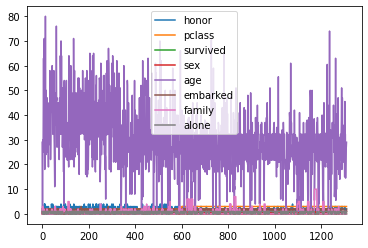

In [139]:
df2.plot()

Text(0, 0.5, 'survived')

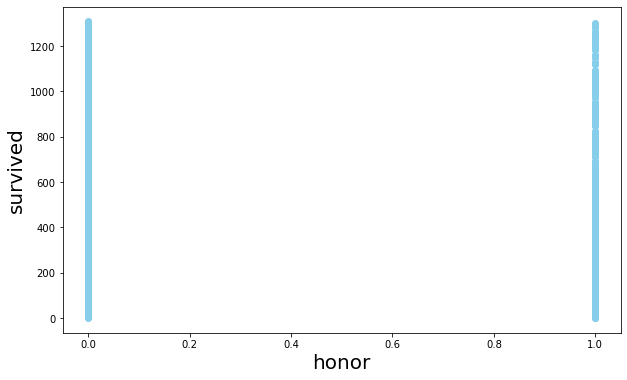

In [135]:
y = df2.index
x = df2.survived
plt.figure(figsize=(10,6))
plt.scatter(x,y,color='skyblue')
plt.xlabel('honor',size=20)
plt.ylabel('survived',size=20)

Text(0.5, 1.0, 'Heatmap of the Dataset')

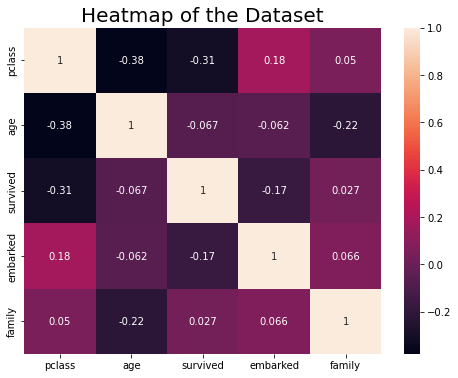

In [144]:
plt.figure(figsize=(8,6))
sns.heatmap(df2[['pclass','age','survived','embarked','family']].corr(),annot=True)
plt.title('Heatmap of the Dataset', fontsize=20)
# 죄다 관련이 없어 보인다
# pcalss랑 embarked가 관련이 있어보이는데
# 어떤 도시냐에 따라 뭔가 있나본데
# 다 만들고 나니까 1도 연관없는 애들만 뽑은 것 같네 ;

In [59]:
df = pd.read_pickle('./dataset/tdf.pkl')
df.head()

,survived,fare_cat,age_cat,family,female,male,town_C,town_Q,town_S
0,1,1,0,0,1,0,0,0,1
1,1,1,4,3,0,1,0,0,1
2,0,1,4,3,1,0,0,0,1
3,0,1,0,3,0,1,0,0,1
4,0,1,0,3,1,0,0,0,1


In [101]:
from sklearn.model_selection import train_test_split

# 독립변수, 종속변수 분리
y_df = df['survived'] # 종속변수
X_df = df.drop('survived',axis=1) # 독립변수

# 학습용 데이터와 평가용 데이터를 8:2 혹은 7:3으로 분리
X_train,X_test, y_train,y_test = train_test_split(X_df, y_df, test_size=0.2, random_state=11)

print(X_train.shape)
print(X_test.shape)

(1047, 8)
(262, 8)


In [102]:
# 모델 학습 및 평가
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
rf_pred = rf_model.predict(X_test)
accuracy_rf = accuracy_score(y_test, rf_pred).round(2)

lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)
lr_pred = lr_model.predict(X_test)
accuracy_lr = accuracy_score(y_test,lr_pred).round(2)

print(f'rf 정확도 : {accuracy_rf}, lr 정확도 : {accuracy_lr}')

rf 정확도 : 0.77, lr 정확도 : 0.81
